In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from statistics import mean, stdev
from math import sqrt

In [2]:
plt.rcParams.update({'font.size': 14})

In [3]:
# def plot_dist(df, x, y, ylabel, ylim):
#     fig, ax = plt.subplots(figsize = (4,3))
#     # create another grouped boxplot 
#     box_plot = sns.boxplot(x = df[x],
#                 y = df[y],
#                palette = {'Baseline': '#70AD47', 'DVP': '#5B9BD5'}, medianprops={'color':'red'}, showmeans=True,
#                           meanprops={ "markerfacecolor":"white", "markeredgecolor":"black", "markersize": "10"})

#     ax.set_ylim(ylim[0],ylim[1])
#     ax.set_xlabel("")
#     ax.set_ylabel(ylabel)
    
def plot_dist(x_label, avg, errs, ylabel, ylim, file_name=None):
    fig, ax = plt.subplots(figsize = (3,3))
    # create another grouped boxplot 
    ax.bar(x_label, avg, yerr=errs, align='center', alpha=0.5, ecolor='black', 
           capsize=10, color = ['steelblue', 'orange'])

    ax.set_ylim(ylim[0],ylim[1])
    ax.set_xlabel("")
    ax.set_ylabel(ylabel)
    if file_name:
        plt.savefig(file_name, bbox_inches="tight")
    

In [12]:
def normality_test(df, x, y):
    r1 = df[df[x] == 'Baseline'][y].values.tolist()
    r2 = df[df[x] == 'DVP'][y].values.tolist()
    
    return [stats.normaltest(r1), stats.normaltest(r2)]

In [13]:
def ttest(df, x, y):
    r1 = df[df[x] == 'Baseline'][y].values.tolist()
    r2 = df[df[x] == 'DVP'][y].values.tolist()
    
    return stats.ttest_rel(r1, r2)

In [14]:
def get_average(df, x, y):
    
    r1 = df[df[x] == 'Baseline'][y].values.tolist()
    r2 = df[df[x] == 'DVP'][y].values.tolist()
    
    r1 = sum(r1)/len(r1)
    r2 = sum(r2)/len(r2)
    
    return [r1, r2]

In [15]:
def get_std(df, x, y):
    
    r1 = df[df[x] == 'Baseline'][y].values
    r2 = df[df[x] == 'DVP'][y].values
    
    r1 = np.std(r1)
    r2 = np.std(r2)
    
    return [r1, r2]

In [23]:
def sub_df(df, story, v):
    
    df = df[df['Story'] == story]
    r1 = df[df['Interface'] == 'Baseline'][v].values.tolist()
    r2 = df[df['Interface'] == 'DVP'][v].values.tolist()
    
    return [r1, r2]
    

In [24]:
def cohens_d(c0, c1):
    return (mean(c0) - mean(c1)) / (sqrt((stdev(c0) ** 2 + stdev(c1) ** 2) / 2))

In [33]:
from numpy import std, mean, sqrt
def cohens_d(x,y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (mean(x) - mean(y)) / sqrt(((nx-1)*std(x, ddof=1) ** 2 + (ny-1)*std(y, ddof=1) ** 2) / dof)

In [31]:
def cohens_d(x,y):
    differences_group_values = np.subtract(x, y)
    std_dev_differences_group_values = np.std(differences_group_values, ddof=1)
    d = round(abs((mean_1 - mean_2)/std_dev_differences_group_values), 2)
    
    return d

#### Accuracy

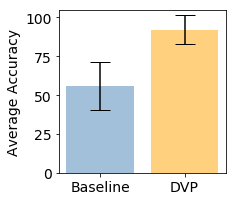

In [50]:
acc = pd.read_csv("accuracy.csv")
acc['Score'] = acc['Score']
acc['Interface'].replace({"DramatVis Personae": "DVP"}, inplace=True)
avg = get_average(acc, 'Interface', 'Score')
errs = get_std(acc, 'Interface', 'Score')
plot_dist(['Baseline', 'DVP'], avg, errs, 'Average Accuracy', [0, 105], "accuracy.pdf")

In [51]:
[r1, r2] = sub_df(acc, 'A kiss of Ice', 'Score')
print(r1, r2)
cohens_d(r2, r1)

[71.42857143, 57.14285714, 57.14285714, 57.14285714, 71.42857143] [100.0, 85.71428571, 100.0, 100.0, 85.71428571, 100.0]


4.272309863255904

In [52]:
[r1, r2] = sub_df(acc, 'The Prisoners', 'Score')
print(r1, r2)
cohens_d(r2, r1)

[71.42857143, 28.57142857, 42.85714286, 57.14285714, 71.42857143, 28.57142857] [100.0, 85.71428571, 85.71428571, 100.0, 71.42857143]


2.309577091313766

In [17]:
print("average: ", avg)
print("std: ", errs)
print("diff", avg[0] - avg[1])
# print(normality_test(acc, 'Interface', 'Score'))
ttest(acc, 'Interface', 'Score')

average:  [5584.415584363636, 9220.779220636365]
std:  [1547.5812062770492, 936.5068248750841]
diff -3636.3636362727284


Ttest_relResult(statistic=-5.863954715744246, pvalue=0.00015858665202644505)

#### Time

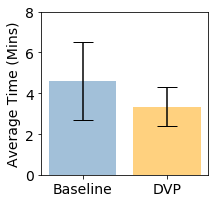

In [38]:
tm = pd.read_csv("time.csv")
tm['Interface'].replace({"DramatVis Personae": "DVP"}, inplace=True)

avg = get_average(tm, 'Interface', 'Time (Minutes)')
errs = get_std(tm, 'Interface', 'Time (Minutes)')
plot_dist(['Baseline', 'DVP'], avg, errs, 'Average Time (Mins)', [0, 8], "time.pdf")

In [40]:
[r1, r2] = sub_df(tm, 'A kiss of Ice', 'Time (Minutes)')
print(r1, r2)
cohens_d(r2, r1)

[8.25, 3.4, 4.3, 3.44, 5.2] [4.4, 3.46, 5.3, 2.15, 3.2, 2.55]


-0.8823299150188504

In [42]:
[r1, r2] = sub_df(tm, 'The Prisoners', 'Time (Minutes)')
print(r1, r2)
cohens_d(r2, r1)

[5.1, 3.5, 8.4, 2.35, 3.4, 3.45] [3.31, 4.3, 3.5, 2.3, 2.3]


-0.7162240625463696

In [224]:
print("average: ", avg)
print("std: ", errs)
print("diff", avg[0] - avg[1])
ttest(tm, 'Interface', 'Time (Minutes)')

average:  [4.734, 3.4219999999999997]
std:  [1.9692902274677546, 0.9725924120617023]
diff 1.3120000000000003


Ttest_relResult(statistic=2.3302035145933924, pvalue=0.04473221642997322)

#### SUS

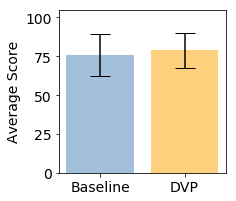

In [43]:
sus = pd.read_csv("SUS.csv")
sus['Interface'].replace({"DramatVis Personae": "DVP"}, inplace=True)

avg = get_average(sus, 'Interface', 'Score')
errs = get_std(sus, 'Interface', 'Score')
plot_dist(['Baseline', 'DVP'], avg, errs, 'Average Score', [0, 105], "sus.pdf")

In [228]:
print("average: ", avg)
print("std: ", errs)
print("diff", avg[0] - avg[1])
ttest(sus, 'Interface', 'Score')

average:  [74.75, 79.5]
std:  [13.84963898446454, 11.661903789690601]
diff -4.75


Ttest_relResult(statistic=-0.9116791454012928, pvalue=0.3857060081019854)

In [45]:
[r1, r2] = sub_df(sus, 'A kiss of Ice', 'Score')
print(r1, r2)
cohens_d(r2, r1)

[77.5, 95.0, 65.0, 90.0, 70.0] [72.5, 62.5, 95.0, 87.5, 80.0, 72.5]


-0.09567222999142348

#### NASA TLX

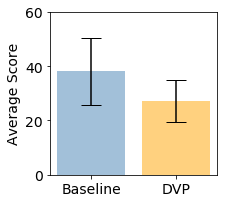

In [46]:
tlx = pd.read_csv("nasa-tlx.csv")
tlx['Interface'].replace({"DramatVis Personae": "DVP"}, inplace=True)
avg = get_average(tlx, 'Interface', 'Score')
errs = get_std(tlx, 'Interface', 'Score')
plot_dist(['Baseline', 'DVP'], avg, errs, 'Average Score', [0, 60], 'tlx.pdf')

In [47]:
print("average: ", avg)
print("std: ", errs)
print("diff", avg[0] - avg[1])
ttest(tlx, 'Interface', 'Score')

average:  [38.106060607272724, 27.272727272727273]
std:  [12.309615344690979, 7.745077526844516]
diff 10.83333333454545


Ttest_relResult(statistic=4.048863799481983, pvalue=0.002327822378896349)

In [49]:
[r1, r2] = sub_df(tlx, 'The Prisoners', 'Score')
print(r1, r2)
cohens_d(r2, r1)

[60.0, 36.66666667, 62.5, 30.0, 40.0, 20.0] [40.83333333, 22.5, 24.16666667, 22.5, 24.16666667]


-1.0848838188119903